# Influenza consensus calling with VAPOR
## Comparing remapping and complete vs. incomplete references
### April 22nd, 2025

In this notebook we use VAPOR to select references from a database to perform reference-guided assembly. We compare the following strategies on challenging sample:

- complete (i.e., segments that contain Uni12 and Uni13) vs. incomplete segments from the database
- zero vs. one remapping step

The past few notebooks have demonstrated that remapping can either reveal or conceal additional consensus sequence depending on whether a filling strategy is used or not, respectively. In the previous notebook we showed that only one out of ten reference segments are retained when we impose the condition that they are complete.

Here we show that VAPOR is capable of selecting references that are similar enough to not even require a remapping step when enough sequences are used. However, when we restrict to segments that are complete with Uni12 and Uni13, we see far more ambiguous bases called and remapping revealing additional hidden bases. The following creates a plot of how many Ns are called on ms_w2, replicate 1, segment pa with each combination of 1) all vs. complete references 2) zero vs. one remappings.

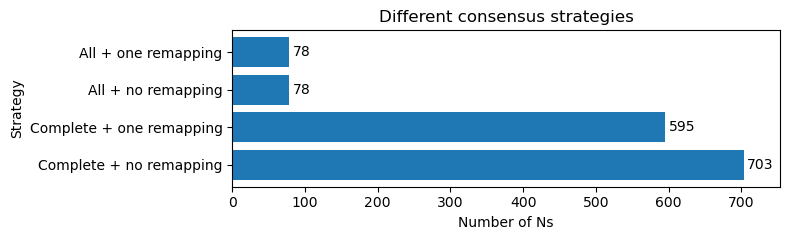

In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt

%matplotlib inline

def extract_info(record):
    Ns = sum([i == 'N' for i in record])
    return Ns

complete_fasta = list(SeqIO.parse('../../vapor-and-remapping/complete-sequences/unaligned.fasta', 'fasta'))
all_fasta = list(SeqIO.parse('../../vapor-and-remapping/all-sequences/unaligned.fasta', 'fasta'))

labels = [
    'Complete + no remapping', 
    'Complete + one remapping', 
    'All + no remapping',
    'All + one remapping'
]
values = [
    extract_info(complete_fasta[0]),
    extract_info(complete_fasta[1]),
    extract_info(all_fasta[0]),
    extract_info(all_fasta[1])
]

fig, ax = plt.subplots(figsize=(8, 2.5))  # wider figure
ax.barh(labels, values)

for i, v in enumerate(values):
    ax.text(v + 5, i, str(v), va='center')  # bump spacing more here too

ax.set_xlim(0, max(values) + 50)  # extra space for longest label
ax.set_xlabel('Number of Ns')
ax.set_ylabel('Strategy')
ax.set_title('Different consensus strategies')

plt.tight_layout()
plt.show()

We see that there is no added benefit to remapping when VAPOR can select from all available references, and that these two are the strongest strategy, yielding the fewest Ns called.

When we restrict the database search to include complete PA segments, we see that far more Ns are called, and that additional consensus is revealed upon a remapping.

This begs the question: how can we leverage the richness of the database in choosing similar references while still getting a complete reference to guide assembly?